# Ejercicio 1 – Predicción de Riesgo de Diabetes
# Fase 1: CARGA Y EXPLORACIÓN GENERAL por Stephanie | Rama: Steph

**1.- Importación de librerias**

In [2]:
# Importamos polars para el análisis de datos
import polars as pl

# y librerías de visualización que se usarán después
import matplotlib.pyplot as plt
import seaborn as sns


**1.2- Cargamos el dataset con polars.**

In [3]:
# archivo CSV en la carpeta datasets
df = pl.read_csv("../datasets/diabetes.csv")

# para mostrar las primeras filas para verificar
df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


**1.3- Revisamos la información general del dataframe**

In [4]:
# Número de filas y columnas
print("Número de filas:", df.height)
print("Número de columnas:", df.width)

# Esquema del dataframe: para conocer los nombres de columnas y tipos de datos
df.schema

Número de filas: 768
Número de columnas: 9


Schema([('Pregnancies', Int64),
        ('Glucose', Int64),
        ('BloodPressure', Int64),
        ('SkinThickness', Int64),
        ('Insulin', Int64),
        ('BMI', Float64),
        ('DiabetesPedigreeFunction', Float64),
        ('Age', Int64),
        ('Outcome', Int64)])

**1.4- Estadísticas descriptivas de las columnas numéricas**  
Debemos poner atención a:
- Columnas con valores mínimos en cero donde no debería haber, como puede ser BloodPressure = 0  
- Variables con mucha dispersión  
- Columnas donde los valores parecen inconsistentes con una variable fisiológica.

In [5]:
df.describe()

statistic,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
"""std""",3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
"""25%""",1.0,99.0,62.0,0.0,0.0,27.3,0.244,24.0,0.0
"""50%""",3.0,117.0,72.0,23.0,32.0,32.0,0.374,29.0,0.0
"""75%""",6.0,140.0,80.0,32.0,127.0,36.6,0.626,41.0,1.0
"""max""",17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


**1.5 – Verificamos valores nulos por columna**

In [6]:
df.null_count()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


# Fase 2: LIMPIEZA BÁSICA por Stephanie | Rama: Steph

**2.1 – Identificar columnas con ceros inválidos**

In [7]:
# lista de las columnas donde un valor de 0 no sería fisiológicamente posible
columnas_invalidas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Contamos cuántos ceros hay en cada una de estas columnas
for col in columnas_invalidas:
    n_ceros = df.filter(pl.col(col) == 0).height
    print(f"{col}: {n_ceros} registros con valor 0")

Glucose: 5 registros con valor 0
BloodPressure: 35 registros con valor 0
SkinThickness: 227 registros con valor 0
Insulin: 374 registros con valor 0
BMI: 11 registros con valor 0


**2.2 – Eliminamos los registros con ceros en columnas fisiológicamente críticas**

In [8]:
# creamos una máscara para excluir esos registros
df = df.filter(
    (pl.col("Glucose") != 0) &
    (pl.col("BloodPressure") != 0) &
    (pl.col("BMI") != 0)
)


# revisamos la nueva cantidad de filas
print("Filas restantes después de limpieza crítica:", df.height)

Filas restantes después de limpieza crítica: 724


**2.3 – Ver la distribución de SkinThickness e Insulin**  
El problema es que SkinThickness e Insulin, aún tienen muchos ceros, pero si los eliminamos tendríamos un dataset con muchos menos registros, lo cual podría significar que nuestra muestra ya no sería buena. Asi que lo mejor será visualizar la distribución de SkinThickness e Insulin para decidir imputación.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pdf = df.to_pandas()

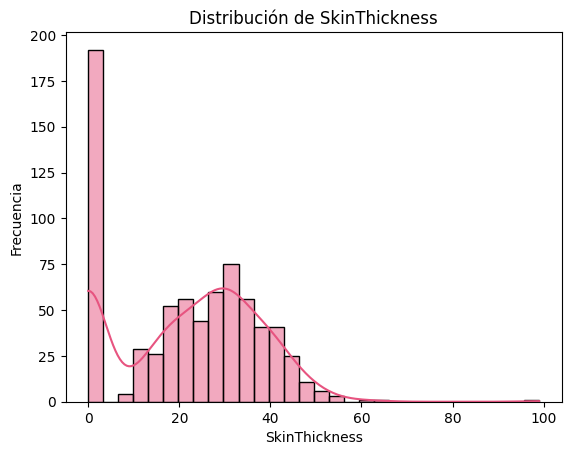

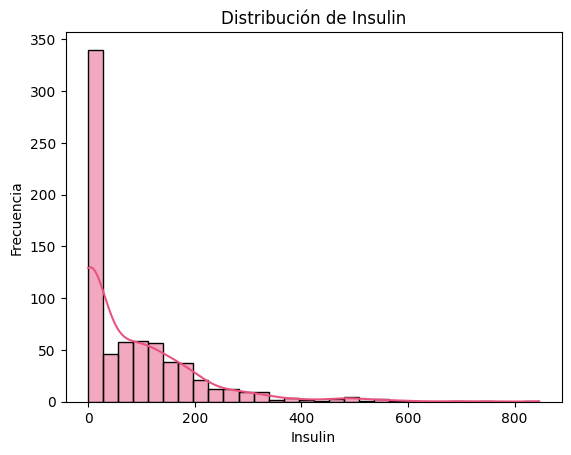

In [10]:
sns.histplot(pdf["SkinThickness"], bins=30, kde=True, color="#e75480")
plt.title("Distribución de SkinThickness")
plt.xlabel("SkinThickness")
plt.ylabel("Frecuencia")
plt.show()


sns.histplot(pdf["Insulin"], bins=30, kde=True, color="#e75480")
plt.title("Distribución de Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frecuencia")
plt.show()

**2.5- Imputación de valores 0 con la mediana**  
En las variables SkinThickness e Insulin existen muchos valores igual a 0, lo cual indica que probablemente no se registraron esas mediciones en ciertos pacientes.  
No se tratan de valores nulos formales, pero sí son fisiológicamente inválidos o sin sentido.  

Dado que eliminar esos registros implicaría para nosotros una pérdida significativa de datos (29% y 48%), será mejor imputar (reemplazar) esos ceros con la mediana de cada variable.

La mediana es más robusta frente a outliers, como vimos en la distribución sesgada de ambas columnas.

In [11]:
# Obtenemos la mediana excluyendo los valores en cero
skin_median = df.filter(pl.col("SkinThickness") != 0)["SkinThickness"].median()
insulin_median = df.filter(pl.col("Insulin") != 0)["Insulin"].median()

# Reemplazamos ceros por la mediana correspondiente usando expresiones condicionales
df = df.with_columns([
    pl.when(pl.col("SkinThickness") == 0)
      .then(skin_median)
      .otherwise(pl.col("SkinThickness"))
      .alias("SkinThickness"),

    pl.when(pl.col("Insulin") == 0)
      .then(insulin_median)
      .otherwise(pl.col("Insulin"))
      .alias("Insulin")
])

# Fase 3: HISTOGRAMAS INDIVIDUALES POR VARIABLE por Stephanie | Rama: Steph 

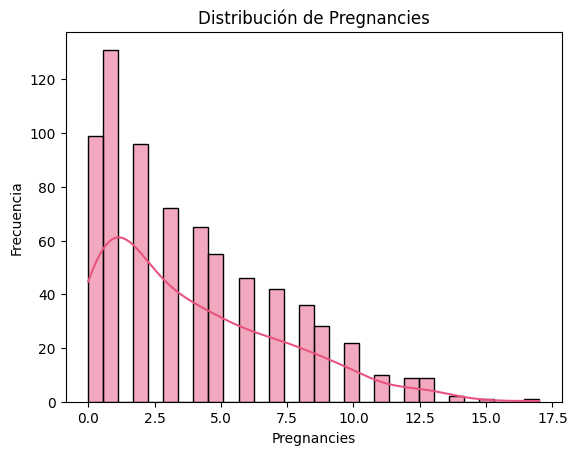

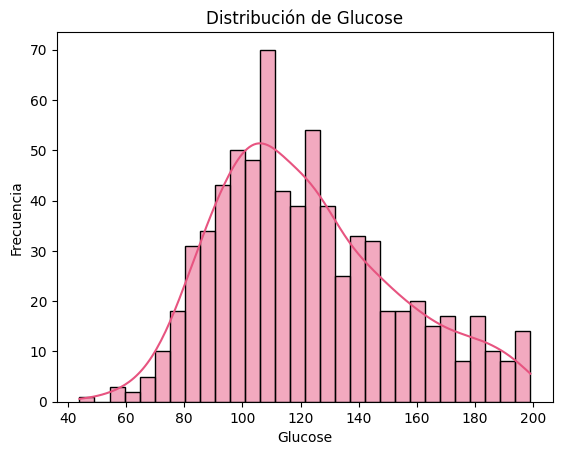

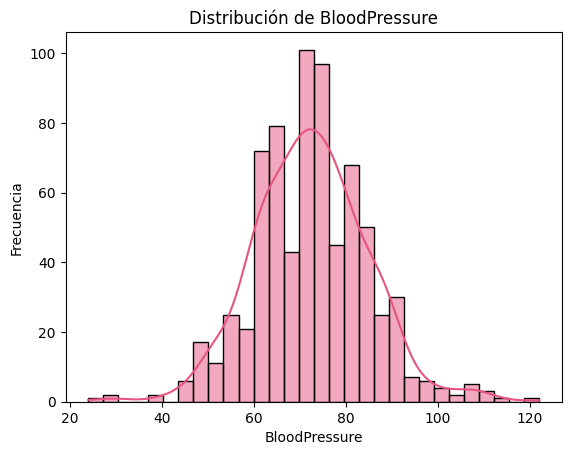

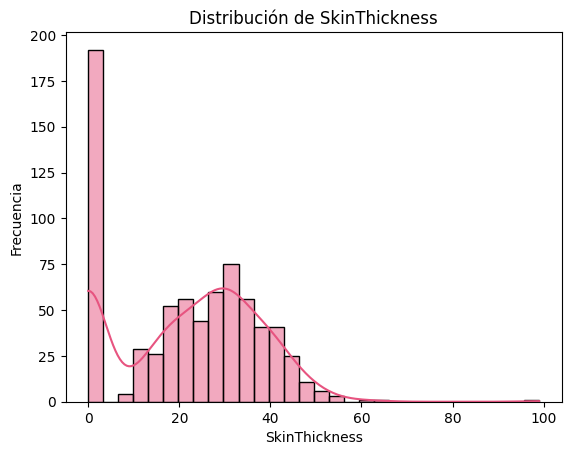

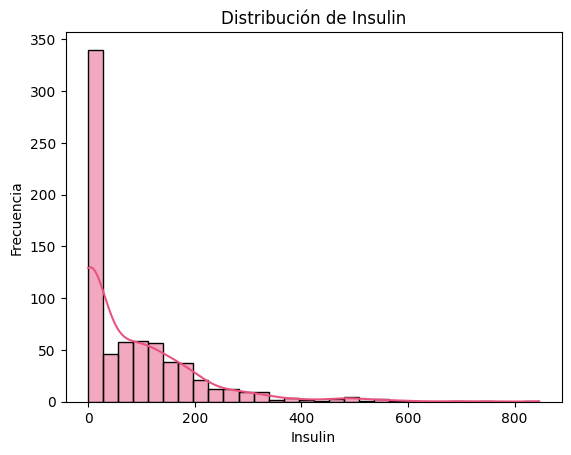

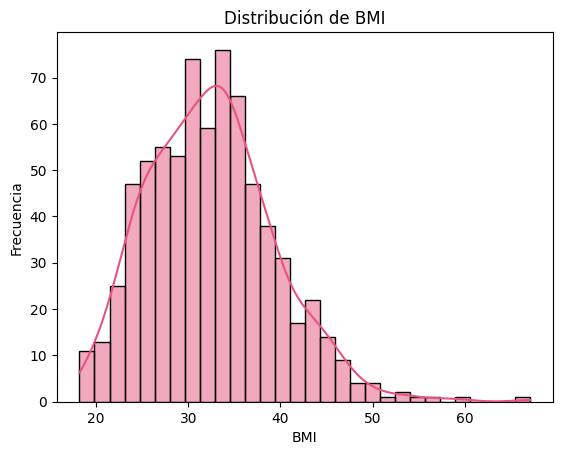

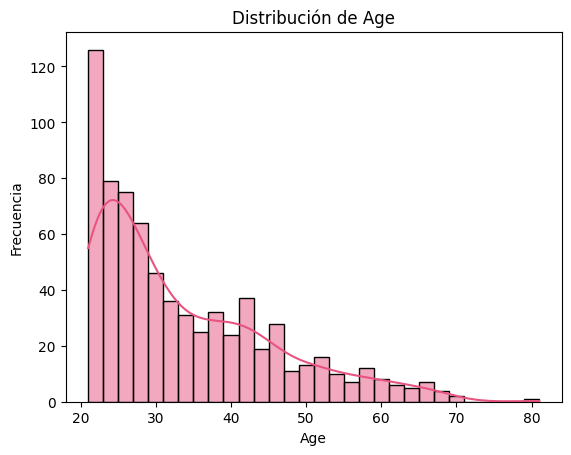

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]

for var in variables:
    sns.histplot(data=pdf, x=var, bins=30, kde=True, color="#e75480")
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

**3.2 – Boxplots comparativos entre clases (Outcome)**

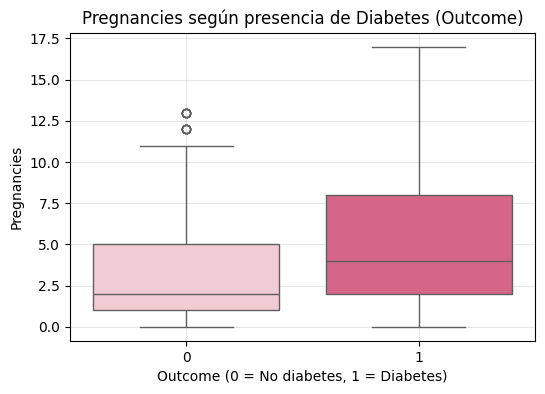

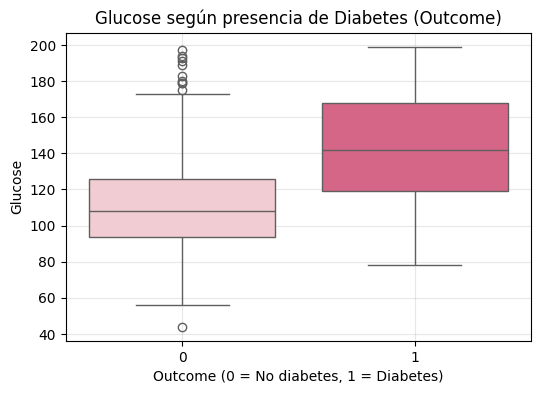

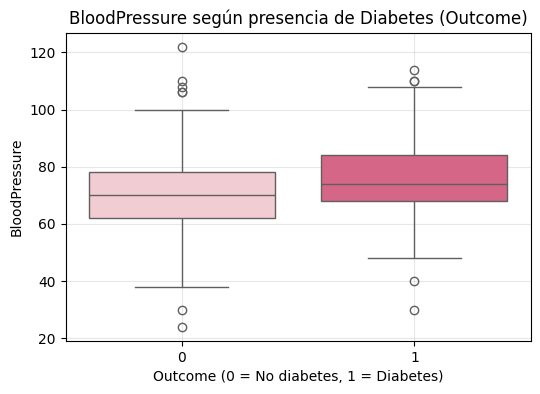

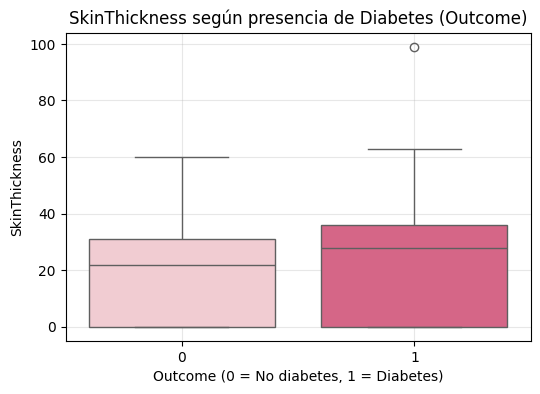

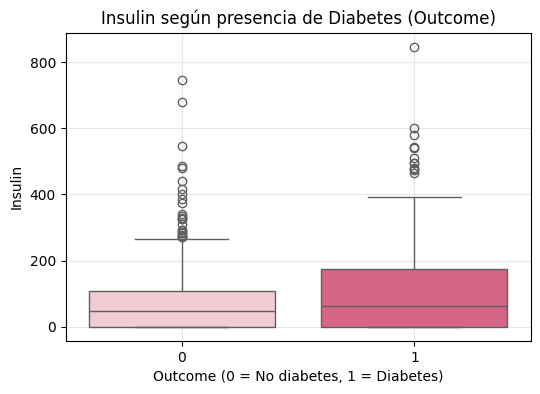

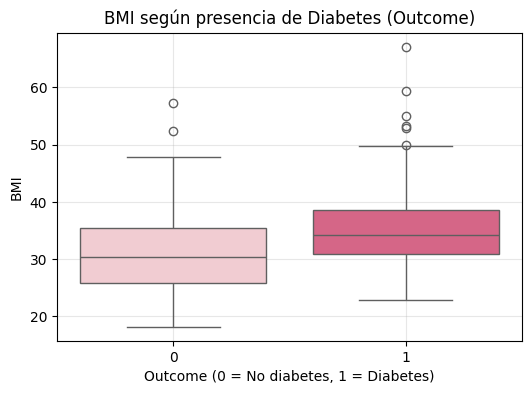

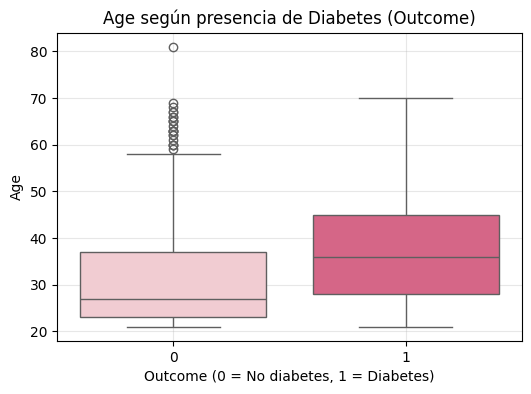

In [13]:
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=pdf,
        x="Outcome",
        y=var,
        hue="Outcome",
        palette={0: "#f7c6ce", 1: "#e75480"},
        dodge=False
    )
    plt.title(f"{var} según presencia de Diabetes (Outcome)")
    plt.xlabel("Outcome (0 = No diabetes, 1 = Diabetes)")
    plt.ylabel(var)
    plt.legend([], [], frameon=False)  # Oculta la leyenda para que se vea limpio
    plt.grid(True, alpha=0.3)
    plt.show()

**3.3 – Matriz de correlación entre variables numéricas**

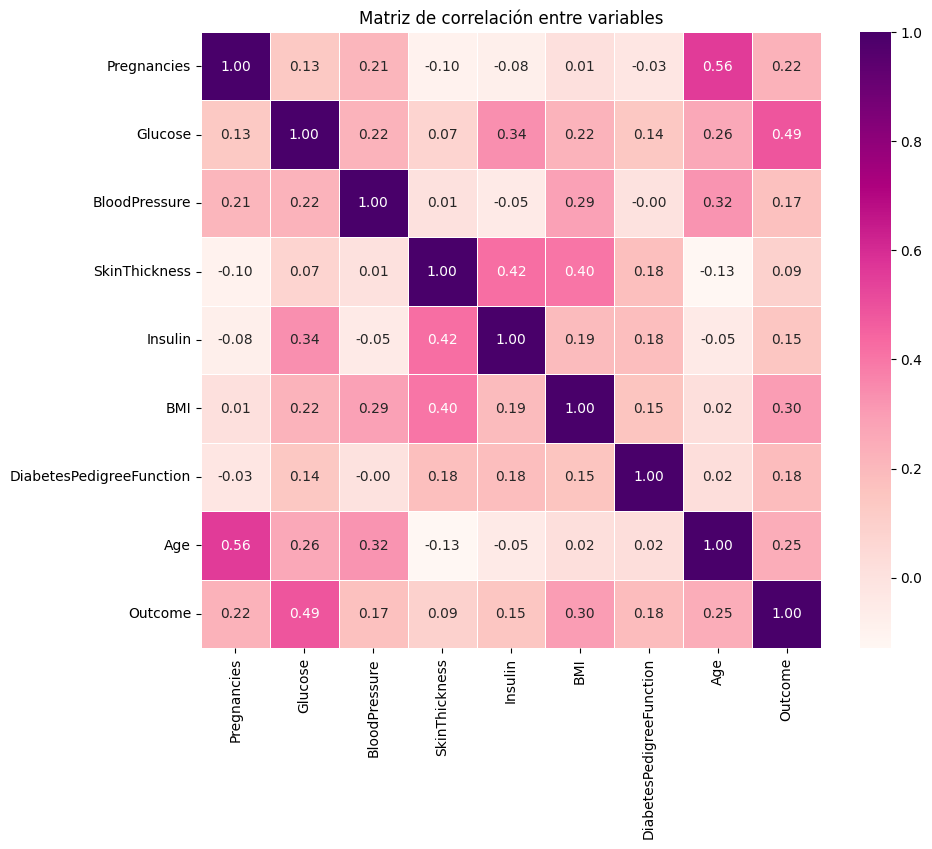

In [14]:
# Calculamos la matriz de correlación
correlation_matrix = pdf.corr()

# Dibujamos el heatmap con colores en rosa
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Muestra los valores numéricos
    cmap="RdPu",             # Paleta rosa/morado
    linewidths=0.5,          # Líneas entre cuadros
    fmt=".2f"                # Formato de los números
)
plt.title("Matriz de correlación entre variables")
plt.show()

# Fase 4: Preprocesamiento técnico por Eduardo | Rama: Eduardo 

Para preparar los datos antes de entrenar los modelos, se realizaron los siguientes pasos:

Separación de variables: se dividieron las variables independientes (X) de la variable objetivo (y), que en este caso es la columna Outcome (0 = no tiene diabetes, 1 = tiene diabetes).

Escalado de variables numéricas: se aplicó StandardScaler de scikit-learn para transformar las variables numéricas a una escala con media 0 y desviación estándar 1. Esto es importante, especialmente para algoritmos como KNN o Regresión Logística.

Partición del dataset: se dividió el dataset en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar posteriormente el desempeño de los modelos.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separar features y target
X = pdf.drop('Outcome', axis=1)
y = pdf['Outcome']

# 2. Escalar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Paso 5: Entrenamiento del modelo por Eduardo | Rama: Eduardo 

Se entreno un modelo de clasificación para predecir si un paciente tiene diabetes (Outcome):

Random Forest: ensamble de árboles de decisión que mejora precisión y generalización.




In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 6. Evaluación del modelo por Eduardo | Rama: Eduardo 

Se evaluó el modelo Random Forest utilizando el conjunto de prueba. Las métricas obtenidas fueron:

Accuracy: mide el porcentaje de predicciones correctas.

Precision: indica qué proporción de predicciones positivas fueron correctas.

Recall: indica qué proporción de casos positivos reales fueron detectados.

F1-score: combina precisión y recall en una sola métrica balanceada.

Además, se visualizó la matriz de confusión para identificar errores de clasificación entre las clases (diabetes / no diabetes).

Evaluación del modelo Random Forest:
Accuracy: 0.80
Precision: 0.66
Recall: 0.67
F1-score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       102
           1       0.66      0.67      0.67        43

    accuracy                           0.80       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145



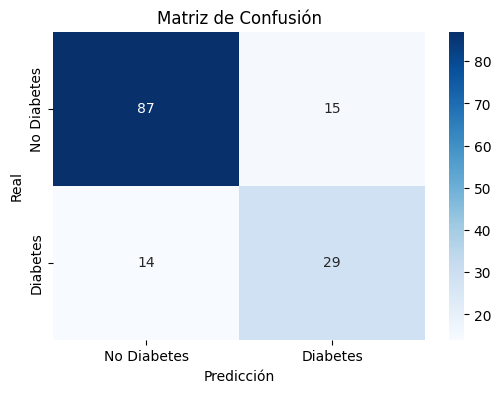

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluación del modelo Random Forest:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## punto 7: Visualización de resultados y métricas por Eduardo | Rama: Eduardo 

Para interpretar mejor los resultados del modelo Random Forest, se realizaron las siguientes visualizaciones:

Matriz de Confusión: permite observar los aciertos y errores en cada clase (diabetes/no diabetes).

Importancia de variables: muestra qué variables influyeron más en la predicción. En este caso, variables como Glucose, BMI y Age fueron especialmente relevantes.

Curva ROC: muestra la capacidad del modelo para distinguir entre clases en diferentes umbrales. 

Estas visualizaciones complementan el análisis numérico y permiten entender mejor el desempeño y comportamiento del modelo.

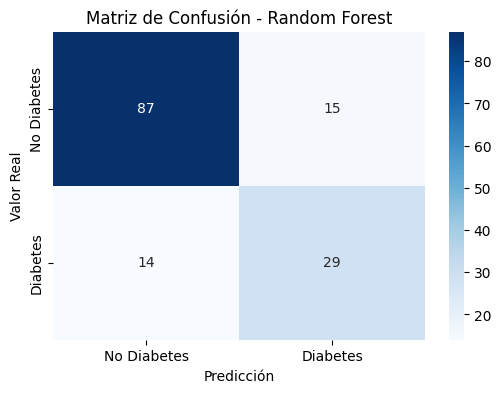

/tmp/ipykernel_5416/1912419146.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')


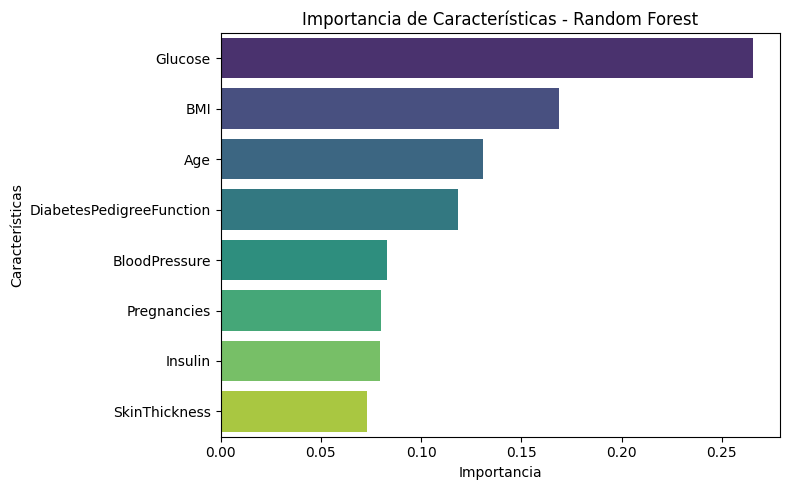

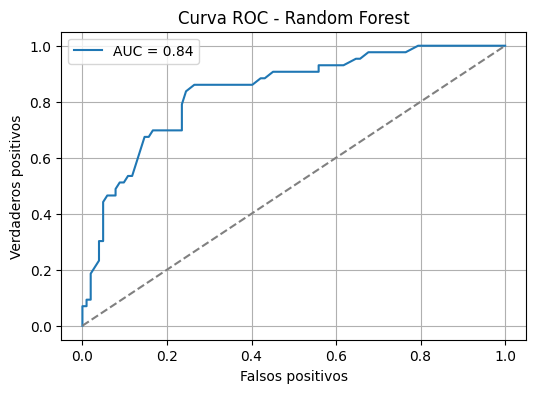

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


import pandas as pd

# Importancia de cada variable
importancias = rf_model.feature_importances_
columnas = pdf.drop('Outcome', axis=1).columns

# Crear DataFrame para visualización
importancia_df = pd.DataFrame({'Característica': columnas, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='viridis')
plt.title("Importancia de Características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()


## 5. Entrenamiento de modelos de Machine Learning | Rama: Main

En esta sección entrenaremos los tres modelos de clasificación supervisada para predecir la presencia de diabetes en pacientes, usando el conjunto de datos preprocesado:

- **Regresión Logística**: modelo lineal comúnmente utilizado en clasificación binaria.
- **K-Nearest Neighbors (KNN)**: clasificador basado en la cercanía a los vecinos más próximos.
- **Random Forest**: modelo de conjunto basado en árboles de decisión que mejora la precisión y generaliza mejor.

Cada modelo será ajustado con los datos de entrenamiento y luego se realizarán predicciones sobre el conjunto de prueba. Esto permitirá evaluar su rendimiento comparativo en la siguiente sección.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 2. Modelo de K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("Reporte - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Aqui entrenamos tres modelos para comparar desempeño.
# Estos modelos los condidramos adecuados para clasificación binaria (presencia/ausencia de diabetes).

Reporte - Random Forest
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       102
           1       0.66      0.67      0.67        43

    accuracy                           0.80       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145



## 6. Evaluación del rendimiento de los modelos 

Después de entrenar los modelos, es fundamental evaluar su capacidad para predecir correctamente los casos de diabetes.

Se utilizarán las siguientes métricas:

- **Accuracy**: proporción de predicciones correctas.
- **Precision**: proporción de verdaderos positivos frente a todos los casos predichos como positivos.
- **Recall (Sensibilidad)**: proporción de verdaderos positivos frente a todos los casos realmente positivos.
- **F1-score**: media armónica entre precision y recall.
- **Matriz de confusión**: tabla que muestra los aciertos y errores de predicción.

Estas métricas permiten comparar objetivamente el desempeño de cada modelo sobre el conjunto de prueba.


Resultados para Regresión Logística:
- Accuracy: 0.80
- Precision: 0.68
- Recall: 0.63
- F1 Score: 0.65

Resultados para KNN:
- Accuracy: 0.72
- Precision: 0.53
- Recall: 0.58
- F1 Score: 0.56

Resultados para Random Forest:
- Accuracy: 0.80
- Precision: 0.66
- Recall: 0.67
- F1 Score: 0.67



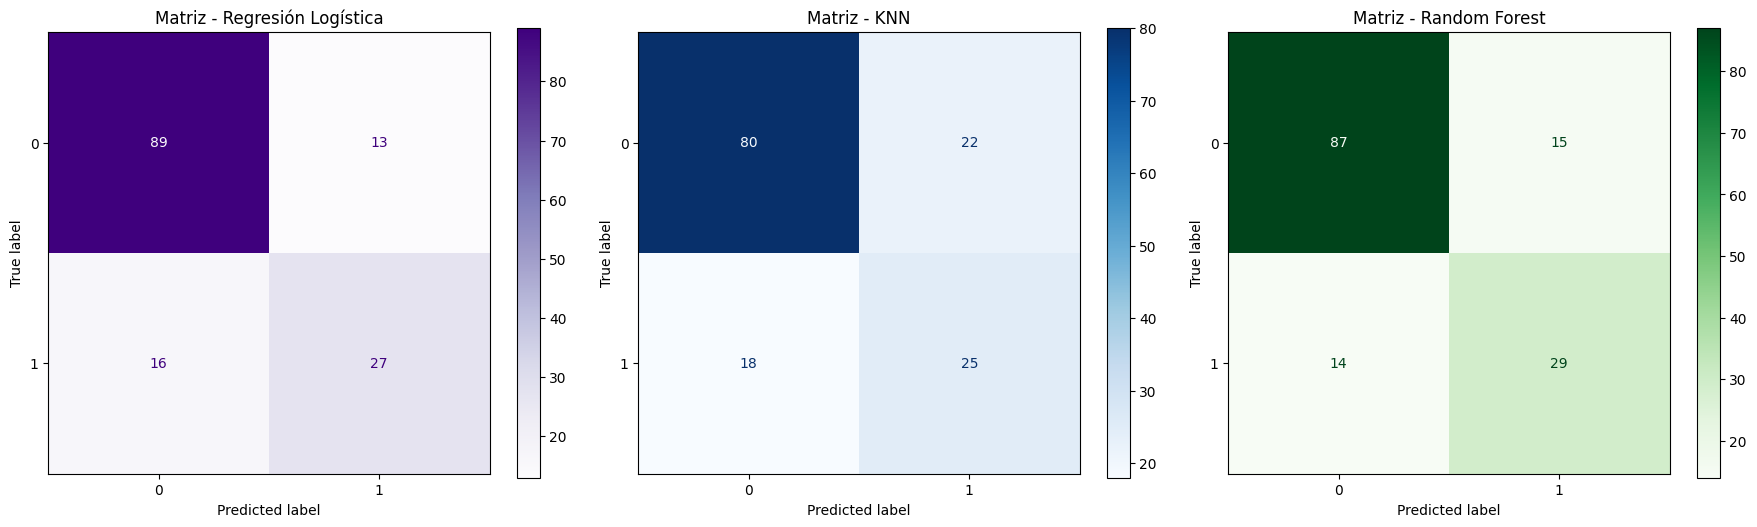

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Función para mostrar métricas
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"Resultados para {nombre}:")
    print(f"- Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"- Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"- Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"- F1 Score: {f1_score(y_true, y_pred):.2f}")
    print()

# Evaluar los tres modelos
evaluar_modelo("Regresión Logística", y_test, y_pred_logreg)
evaluar_modelo("KNN", y_test, y_pred_knn)
evaluar_modelo("Random Forest", y_test, y_pred_rf)

# Visualización de matrices de confusión
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Matriz para Regresión Logística
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, ax=axs[0], cmap="Purples")
axs[0].set_title("Matriz - Regresión Logística")

# Matriz para KNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axs[1], cmap="Blues")
axs[1].set_title("Matriz - KNN")

# Matriz para Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axs[2], cmap="Greens")
axs[2].set_title("Matriz - Random Forest")

plt.tight_layout()
plt.show()


## Conclusiones generales del proyecto

Este proyecto de análisis predictivo aplicado a la detección de diabetes tipo 2 tuvo como objetivo evaluar distintos modelos de clasificación para predecir la presencia o ausencia de la enfermedad a partir de variables clínicas y biométricas disponibles en un dataset abierto.

Durante el desarrollo se realizaron las siguientes etapas clave:

- **Preprocesamiento y limpieza de datos**, eliminando valores inválidos (como ceros en variables que no deberían contenerlos) para mejorar la calidad del análisis.
- **Análisis exploratorio (EDA)**, con visualizaciones estadísticas (histogramas y boxplots) que permitieron entender la distribución de variables relevantes como *Insulin*, *BMI*, *SkinThickness* y su relación con el resultado de diabetes.
- **Preparación del conjunto de datos**, incluyendo escalado y partición en conjuntos de entrenamiento y prueba.
- **Entrenamiento de tres modelos de clasificación**: regresión logística, K-Nearest Neighbors (KNN) y Random Forest.
- **Evaluación comparativa mediante matrices de confusión**, identificando la capacidad predictiva de cada algoritmo.

### Hallazgos principales:

- El modelo de **Random Forest** obtuvo el mejor desempeño general, con mayor capacidad para identificar correctamente a personas con diabetes (clase 1), así como a quienes no la presentan (clase 0).
- La **regresión logística** también mostró un rendimiento sólido, siendo una buena opción como línea base por su interpretación y rapidez.
- El modelo **KNN** fue el menos eficaz, mostrando mayor número de errores de clasificación, aunque es útil para comparación inicial.